<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [47]:
import pandas as pd
import psycopg2
import plotly.express as px

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [50]:
# текст запроса
query_3_1 = f'''select 
                count(id)
                from public.vacancies
'''

In [51]:
# результат запроса
vacancies_count = pd.read_sql_query(query_3_1, connection)
vacancies_count['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\3907089224.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [52]:
# текст запроса
query_3_2 = f'''select 
                count(id)
                from public.employers
'''

In [53]:
# результат запроса
employers_count = pd.read_sql_query(query_3_2, connection)
employers_count['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2251328414.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [54]:
# текст запроса
query_3_3 = f'''select 
                count(id)
                from public.areas
'''

In [55]:
# результат запроса
area_count = pd.read_sql_query(query_3_3, connection)
area_count['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2278604786.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [56]:
# текст запроса
query_3_4 = f'''select 
                count(id)
                from public.industries
'''

In [57]:
# результат запроса
industries_count = pd.read_sql_query(query_3_4, connection)
industries_count['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\250415938.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



294

***

In [58]:
# выводы по предварительному анализу данных
display(round(vacancies_count['count'][0]/258000, 3)*100)
display(round(vacancies_count['count'][0]/employers_count['count'][0], 1))
display(round(vacancies_count['count'][0]/area_count['count'][0], 1))
display(round(vacancies_count['count'][0]/industries_count['count'][0], 1))

19.1

2.1

36.1

167.3

## Выводы
1. Если приближенно посчитать, то по официальным данным 49197 вакансий (без учета отрасли и местности) могут удволетворить лишь 19.1% безработных при общей цифре безработицы 258000 чел.
2. В среднем приходиться 2.1 вакансия на одного работодателя
3. 36,1 вакансия на регион
4. 167,3 вакнсии на каждую из сфер деятельности

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [59]:
# текст запроса
query_4_1 = f'''select 
                a.name area,
                count(v.id) cnt
                from public.vacancies v
                full join public.areas a on v.area_id = a.id
                group by a.name
                order by 2 desc
                limit 5
'''

In [60]:
# результат запроса
areas_vac_count = pd.read_sql_query(query_4_1, connection)
areas_vac_count

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\403392355.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [61]:
# текст запроса
query_4_2 = f'''select 
                count(v.id)
                from public.vacancies v
                where (salary_from is not null) or (salary_to is not null)
'''

In [62]:
# результат запроса
salary_count = pd.read_sql_query(query_4_2, connection)
salary_count['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\72735399.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [63]:
# текст запроса
query_4_3 = f'''select 
                round(avg(v.salary_from)) avg_salary_from,
                round(avg(v.salary_to)) avg_salary_to
                from public.vacancies v
'''

In [64]:
# результат запроса
salary_fork = pd.read_sql_query(query_4_3, connection)
salary_fork

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2774397971.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [65]:
# текст запроса
query_4_4 = f'''select 
                v.schedule,
                v.employment,
                count(v.id)
                from public.vacancies v
                group by 1, 2
                order by 3 desc
                offset 1
                limit 1
'''

In [66]:
# результат запроса
top_employ = pd.read_sql_query(query_4_4, connection)
top_employ

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\1115020063.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,schedule,employment,count
0,Удаленная работа,Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [67]:
# текст запроса
query_4_5 = f'''select 
                v.experience "Требуемый опыт работы",
                count(v.id)
                from public.vacancies v
                where v.experience is not null
                group by 1
                order by 2
'''

In [68]:
# результат запроса
experience = pd.read_sql_query(query_4_5, connection)
experience

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\3054466674.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Требуемый опыт работы,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

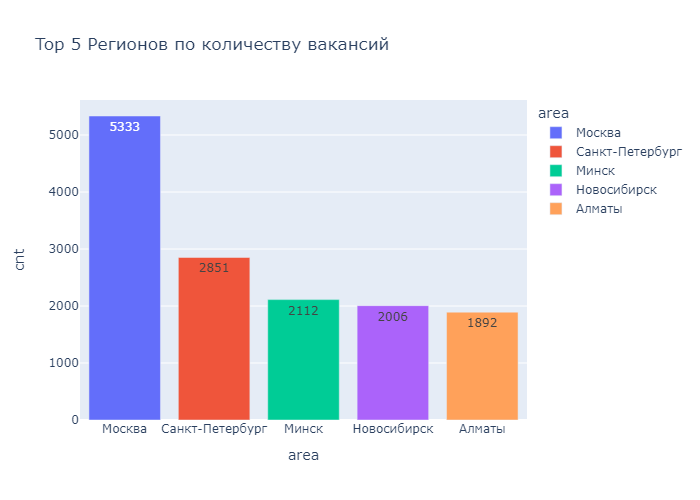

51.1

0    39472.0
dtype: float64

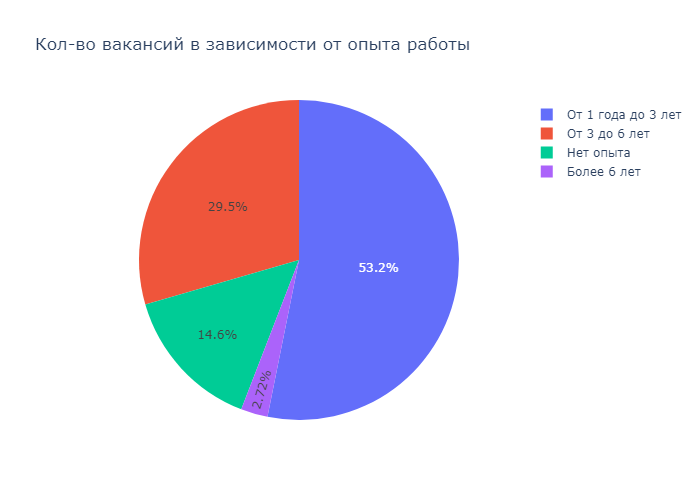

In [69]:
# выводы по детальному анализу вакансий
# 1
fig_1 = px.bar(
    data_frame=areas_vac_count,
    x='area',
    y='cnt',
    color='area',
    text='cnt',
    title='Top 5 Регионов по количеству вакансий'
)

fig_1.show('png')
fig_1.write_image('img/1_Top 5 Регионов по количеству вакансий.png')
#2 
display(round((vacancies_count['count'][0] - salary_count['count'][0])/vacancies_count['count'][0] * 100, 1))

#3 
display(salary_fork['avg_salary_to'] - salary_fork['avg_salary_from'])

#4

fig_2 = px.pie(
    data_frame=experience,
    values='count',
    names='Требуемый опыт работы',
    title='Кол-во вакансий в зависимости от опыта работы'
)
fig_2.show('png')
fig_2.write_image('img/2_Кол-во вакансий в зависимости от опыта работы.png')

## Выводы
---
1. Как и ожидалось в топ 5 городов по количеству вакансий вошли самые населенные и развивающиеся города. Можно также отметить, что москва почти в два раза обгоняет Санкт-Петербург по количеству вакансий.
---
2. В 51.1% вавкансий работодатели не указали информация о заработной плате (ЗП). На основе этой информации можно сделать следующие выводы:
    - половина работодателей склонны к переговорам с соискателями для получения более выгодных условий для компаний;
    - зачастую кандидаты ориентируется на желаемую ЗП, поэтому подобные вакансии могут быть проигнорированны соискателями.
---
3. Разница между средними значениями минимальной и максимальной заработной платы составляет 39472. Это указывает на значительный разброс зарплат в полученных данных. Скорее всего, это связано с различиями в отраслях, регионах или уровнях должностей. Кроме того имея в распоряжении информацию о разбросе соискатели смогут быть более эффективны в переговорах относительно ЗП.
---
4. Самый популярные вариан сочетания графика и типа трудоустройства Удаленная работа и Полная занятость. Подобная тенденция связана во-первых со временым промежутком данных (если не ошибаюсь начало карантина COVID-19) и во-вторых увеличение интернет рынка и рынка цифровых технологий, которые способствуют развитию удаленной работы.
---
5. Как видно из круговой диаграммы большая часть (53,2%) вакансий предназначены для небольшого уровня опыта и вакансии со уровнем опыта выше средего (29,5%). Для соискателей без опыта рынок труда готов предложить 14,6% вакансий. И спрос на кандидатов с уровнем опыта более 6 лет составляет 2,72%.
Можно предположить, что работодатели готовы нанимать на работу и платить ЗП работникам с опытом работы от 1 до 6 лет и с меньшим желанием готовы принимать новичков. Что касается специалистов с опытом более 6 лет, то низкое кол-во вакансий, требующих подобного опыта, может быть связано:
    - С тенденцией работодателей сохранять работников с большим опытом в компаниях
    - Вакансии, требующие более 6 лет опыта работы, могут быть ограничено доступны по сравнению с другими. Такие вакансии обычно связаны с руководящими или специализированными должностями, которые могут быть доступны в небольшом количестве на рынке труда.
---

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [70]:
# текст запроса
query_5_1 = f'''select 
                e.name,
                count(v.id)
                from public.employers e
                join public.vacancies v on e.id = v.employer_id
                group by 1
                order by 2 desc
                limit 5
'''
# с использованием union all, limit и offset можно вывести только 1 и 5 место топа,
# но это усложнит и замедлит запрос

In [71]:
# результат запроса
top_employment = pd.read_sql_query(query_5_1, connection)
top_employment


C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2404766026.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [72]:
# текст запроса
query_5_2 = f'''select 
                a.name,
                count(e.id) employer_count,
                count(v.id) vac_count
                from public.areas a
                left join public.employers e on a.id = e.area
                left join public.vacancies v on a.id = v.area_id
                group by a.name
                having count(v.id) = 0
                order by 2 desc
                limit 1
'''

In [73]:
# результат запроса
top_areas = pd.read_sql_query(query_5_2, connection)
top_areas

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\1460268736.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,employer_count,vac_count
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [74]:
# текст запроса
query_5_3 = f'''select 
                e.name,
                count(distinct v.area_id)
                from public.employers e
                join public.vacancies v on e.id = v.employer_id
                group by e.name
                order by 2 desc
                limit 5
'''

In [75]:
# результат запроса
employers_areas = pd.read_sql_query(query_5_3, connection)
employers_areas

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2763555612.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [76]:
# текст запроса
query_5_4 = f'''select
                count(e.name)
                from public.employers e
                left join public.employers_industries ei on e.id = ei.employer_id
                where ei.employer_id is null
'''

In [77]:
# результат запроса
industries_is_null = pd.read_sql_query(query_5_4, connection)
industries_is_null['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2254800673.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



8419

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [78]:
# текст запроса
query_5_5 = f'''select
                e.name,
                count(ei.industry_id)
                from public.employers e
                left join public.employers_industries ei on e.id = ei.employer_id
                where ei.employer_id is not null
                group by e.name
                having count(ei.industry_id) = 4
                order by 1
                limit 5
'''

In [79]:
# результат запроса
top_four_industries = pd.read_sql_query(query_5_5, connection)
top_four_industries

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2745640781.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [80]:
# текст запроса
query_5_6 = f'''select
                count(ei.employer_id)
                from public.employers_industries ei
                join public.industries i on i.id = ei.industry_id
                where i.name like 'Разработка программного обеспечения'
'''

In [81]:
# результат запроса
dev_soft = pd.read_sql_query(query_5_6, connection)
dev_soft['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\1902764900.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



3553

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [82]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'

response = requests.get(url)
page = BeautifulSoup(response.text, 'lxml')
cities = page.find('tbody').find_next('tbody').find_all('a')
cities = tuple([link.text for link in cities[4:]])
print(cities)


('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


In [83]:
# текст запроса
query_5_7 = f'''select
                a.name area_name,
                count(v.id) vac_count
                from public.vacancies v
                join public.employers e on v.employer_id = e.id
                join public.areas a on v.area_id = a.id
                where e.name like 'Яндекс' and a.name in {cities}
                group by a.name
                
                union all
                
                select
                'total',
                count(v.id)
                from public.vacancies v
                join public.employers e on v.employer_id = e.id
                join public.areas a on v.area_id = a.id
                where e.name like 'Яндекс' and a.name in {cities}
                order by 2 
'''

In [84]:
# результат запроса
yandex_areas = pd.read_sql_query(query_5_7, connection)
yandex_areas

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\3328424714.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area_name,vac_count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

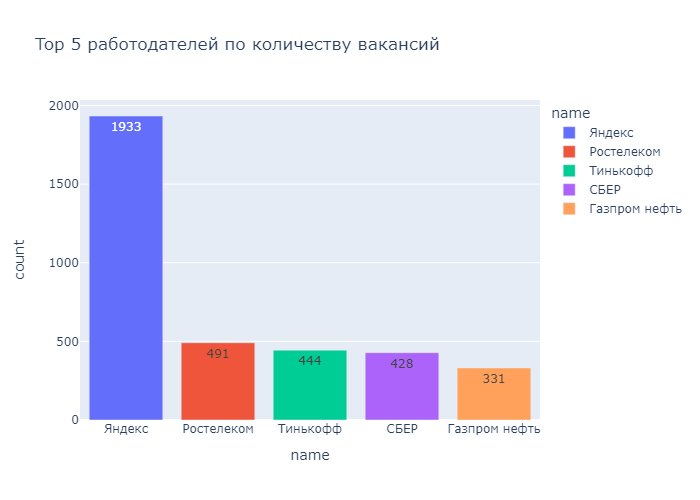

35.8

15.1

25.1

In [85]:
# выводы по анализу работодателей
1# 
fig_3 = px.bar(
    data_frame=top_employment,
    x='name',
    y='count',
    color='name',
    text='count',
    title='Top 5 работодателей по количеству вакансий'
)

fig_3.show('png')
fig_3.write_image('img/3_Top 5 работодателей по количеству вакансий.png')
#2 
empty_industry = industries_is_null['count'].iloc[0]/employers_count['count'].iloc[0] * 100
display(round(empty_industry, 1))

#3
dev_employers = dev_soft['count'].iloc[0]/employers_count['count'].iloc[0] * 100
display(round(dev_employers, 1))

#4

yandex_in_cities = yandex_areas['vac_count'].iloc[16]/top_employment['count'].iloc[0] * 100
display(round(yandex_in_cities, 1))

## Выводы
1. В топ 5 компаний по кол-ву вакансий вошли одни из самых крупных представителей бизнеса в РФ, из сфер: IT и коммуникации, банковский сектор и ресyрсодобывающую сферу. Также можно отметить, что количество вакансий компании Яндекс значительно больше чем предложений от других работодателей в топе, что может говорить о стремительном росте Яндекса и присутствии данной компании во многих отрослях и регионах.
---

2. Некоторые работодатели указывают не конкретный регион, а страну (Россия). На основе этого можно сделать несколько выводов:
    - Это дает некоторую гибкость в выборе и поиске кандидатов не ограничиваясь конкретным регионом.
    - Такие работодатели могут иметь представительства в нескольких регионах РФ.
    - Также можно предположить о некоторой конфидециальности, когда компания не хочет раскрывать регион своего присутствия по тем или иным причинам.
*Возможно, подобный подход увеличит кол-во откликов при условии хороших предложенй от работодателей или возможности удаленной работы.*
---

3. Как и ожидалось в топ компаний по количеству регионов, в которых размещатся вакансии входят такие гиганты в сферах интернета и коммуникаций как Яндекс, Ростелеком, что связано во-первых с большим охватом и большим кол-вом партнеров и представительств в разных регионах, во-вторых все топ компании в данном рейтинге представляют те или иные услуги, что не требует крупного местного присутствия (как пример не требуют налаживание локального производства).
---

4. 35,8% работодателей не указывают сверу своей деятельности, что может затруднить оценку вакансий соискателями и тем самым снижается эффективность поиска кандидатов.
---

5. Можно предположить, что компании, указавших 4 сферы деятельности, и у которых название начинается с цифр так или иначе связаны с интернет деятьльностью, но скорее всего в задании 5.5 проводиться простое упорядочение данных и не несет какой-либо аналитической значимости.
---

6. 15,1% рынка труда занимают работодатели занимающиеся разработкой программного обеспечения. Что составляет существенную долю рынка.
---

7. Четверть (25,1%) вакансий Яндекса находяться в городах милионниках из них большая часть (96 вакансий) размещены в Москве и Санкт-Петерурге. Можно предположить, что Яндекс доминирует на рынке труда РФ и на локальных рынках городов-милионников
---

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [86]:
# текст запроса
query_6_1 = f'''select
                count(v.id)
                from public.vacancies v
                where v.name ilike '%data%' or v.name ilike '%данн%'
'''


In [87]:
# результат запроса
data_count = pd.read_sql_query(query_6_1, connection)
data_count['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2168712258.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [88]:
# текст запроса
query_6_2 = f'''select
                count(v.id)
                from public.vacancies v
                where (v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%' 
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%')
                and (v.name ilike '%junior%'
                or v.experience ilike '%нет опыта%'
                or v.employment ilike '%стажировка%')
'''

In [89]:
# результат запроса
junior_count = pd.read_sql_query(query_6_2, connection)
junior_count['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\3270465796.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

**Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [90]:
# текст запроса
query_6_3 = f'''select
                count(v.name)
                from public.vacancies v
                where (v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%'
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%')
                and (v.key_skills ilike '%SQL%'
                or v.key_skills ilike '%postgres%')
'''

In [91]:
# результат запроса
junior_count_sql = pd.read_sql_query(query_6_3, connection)
junior_count_sql['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\404897991.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



201

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [92]:
# текст запроса
query_6_4 = f'''select
                count(v.name)
                from public.vacancies v
                where (v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%'
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%')
                and (v.key_skills ilike '%python%')
'''

In [93]:
# результат запроса
junior_count_python = pd.read_sql_query(query_6_4, connection)
junior_count_python['count'][0]

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\2199315356.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



351

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [94]:
# текст запроса
query_6_5 = f'''select
                avg(length(v.key_skills) - length(replace(v.key_skills, CHR(9), '')) + 1) average
                from public.vacancies v
                where (v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%'
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%')
                and (v.key_skills is not null)
'''

In [95]:
# результат запроса
skill_avg = pd.read_sql_query(query_6_5, connection)
display(round(skill_avg['average'][0], 2))

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\829556572.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



6.41

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [96]:
# текст запроса
query_6_6 = f'''select
                distinct v.experience,
                round(avg(coalesce((v.salary_to + v.salary_from)/2, v.salary_from, v.salary_to)))
                from public.vacancies v
                where v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%'
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%'
                group by 1
'''

In [97]:
# результат запроса
salary_avg = pd.read_sql_query(query_6_6, connection)
salary_avg

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\1734171801.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,round
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


***

In [98]:
# выводы по предметному анализу
#1
query_6 = f'''select
                count(v.id)
                from public.vacancies v
                where (v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%'
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%')
'''

ds_count = pd.read_sql_query(query_6, connection)
display(ds_count['count'][0])

display(round(ds_count['count'][0]/vacancies_count['count'][0] * 100, 1))
display(round(junior_count['count'][0]/ds_count['count'][0] * 100, 1))
display(round(1751/junior_count['count'][0], 1))
display(round(junior_count_python['count'][0]/ds_count['count'][0] * 100, 1))
display(round(junior_count_sql['count'][0]/ds_count['count'][0] * 100, 1))

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\331676555.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



480

1.0

10.6

34.3

73.1

41.9

## Выводы
---
1. Из предложенных расчетов видно, что количество вакансий, имеющтх отношение к данным 480, что состовляет 1% от общего кол-ва вакансий (49197). Из ds-вакансий всего 10,6% составляют вакансии где работодатель ищет начинающих специалистов при этом по информации с сайта skillfactory.ru на курсе DST проходят обучение 1751 студент. Эти грубые подсчеты приводят к весьма нерадостным выводам об огромной конкуренции ~34 человека на место. <br>
**Подсчеты грубые и поверхостные*
---
2. Также можно сделать вывод, что вакансии в этой сфере требуют опыта работы или специализированных навыков. В данной области есть достаточно высокий спрос на профессионалов с опытом работы, и начинающим специалистам может быть сложнее найти подходящие вакансии.
---
3. В среднем начинающий кандидат должен иметь 6 навыков из которых основные это python(73,1% ds-вакансий) и SQL (41,9% ds-вакансий). Таким образом ds-специалист скорее всего не найдет работу без основных навыков в python и SQL
---
4. Те соискатели, которые смогут найти работу в данной сфере за 1 - 3 года смогут увеличить свой доход практически вдвое с 74643 до 139675. Другими словами год работы над реальными проектами в компании, для новичка может увеличить стоимость в среднем в два раза.

# Общий вывод по проекту

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\3492308358.py:50: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



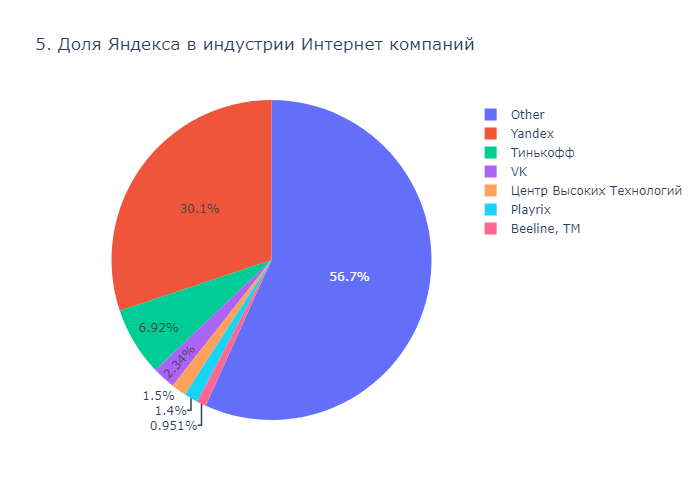

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\3492308358.py:83: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,Банк ВТБ (ПАО),10
1,The Skolkovo Institute of Science and Technology,3
2,Comexp,3
3,Диплей,2
4,SteadyControl,2
5,"СтарЛайн, Научно-производственное объединение",2


C:\Users\79779\AppData\Local\Temp\ipykernel_12204\3492308358.py:102: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



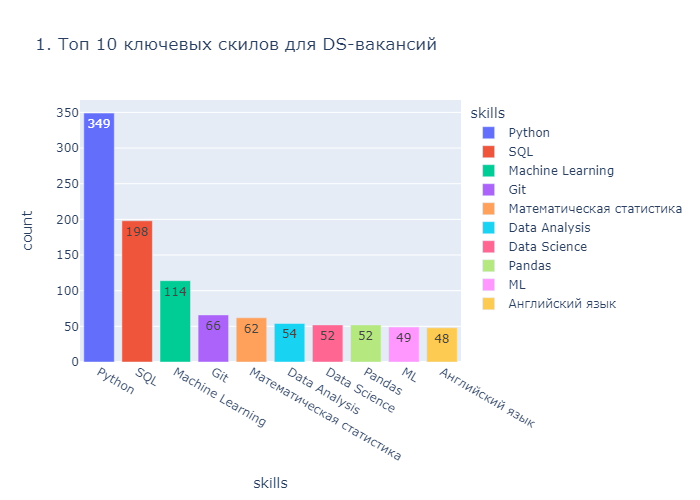

C:\Users\79779\AppData\Local\Temp\ipykernel_12204\3492308358.py:160: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experiens,skills_avg
0,Нет опыта,7.4
1,От 1 года до 3 лет,6.7
2,От 3 до 6 лет,6.0
3,Более 6 лет,5.9


In [99]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

# 1.1 Анализируем долю вакансий Яндекс в своей индустрии
# SQL запрос для получения инфы о кол-ве вакансий Яндекс, топ 5 компаний и остальных работодателей
conclusion_1_1 = f'''with top_companies as
                (select
                e.name company,
                count(v.id) count
                from public.vacancies v
                join public.employers e on v.employer_id = e.id
                join public.employers_industries ei on ei.employer_id = e.id
                join public.industries i on i.id = ei.industry_id
                where i.id::float = 7.541 and e.name not like 'Яндекс'
                group by e.name
                order by count(v.id) desc
                limit 5)
                
                select * from(
                select
                    company,
                    count
                from top_companies
                
                union all
                
                select
                'Yandex' company,
                count(v.id)
                from public.vacancies v
                join public.employers e on v.employer_id = e.id
                join public.employers_industries ei on ei.employer_id = e.id
                join public.industries i on i.id = ei.industry_id
                where i.id::float = 7.541 and e.name like 'Яндекс'
                
                union all
                
                select
                'Other',
                count(v.id)
                from public.vacancies v
                join public.employers e on v.employer_id = e.id
                join public.employers_industries ei on ei.employer_id = e.id
                join public.industries i on i.id = ei.industry_id
                where i.id::float = 7.541 and e.name not like 'Яндекс'
                and e.name not in (select company from top_companies)
                ) as result
                order by 2 desc
'''
top_industry = pd.read_sql_query(conclusion_1_1, connection)

fig_4 = px.pie(
    data_frame=top_industry,
    values='count',
    names='company',
    title='5. Доля Яндекса в индустрии Интернет компаний'
)
fig_4.show('png')
fig_4.write_image('img/4_Доля Яндекса в индустрии Интернет компаний.png')

# 1.2 изучаем компании с большим кол-вом вакансий для начинающих DS
# SQL запрос с группировкой по компаниям
conclusion_1_2 = f'''select
                e.name,
                count(v.id)
                from public.vacancies v
                join public.employers e on v.employer_id = e.id
                where (v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%' 
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%')
                and (v.name ilike '%junior%'
                or v.experience ilike '%нет опыта%'
                or v.employment ilike '%стажировка%')
                group by 1
                order by 2 desc
                limit 6
'''

jun = pd.read_sql_query(conclusion_1_2, connection)
display(jun)

# 2.1 Изучаем топ 10 необходимых скиллов для DS

# SQL запрос для получения списка скиллов по всем вакансиям для DS
# сразу в запросе разделяем скиллы символом "/"
conclusion_1_3 = f'''select
                replace(v.key_skills, CHR(9), '/') as key_skills
                from public.vacancies v
                where (v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%'
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%')
                and (v.key_skills is not null)
'''
skills = pd.read_sql_query(conclusion_1_3, connection)

# функция для подсчета топ 10 навыков для DS
def create_df(data, column):
    # делаем список из строки
    data[column] = data[column].apply(lambda x: x.split('/')) 
    
    top ={}
    for row in data[column]:
        for word in row:
            if word not in top:
                top[word] = 1
            else:
                top[word] += 1
    # получаем топ 10 частовстречающихся скиллов
    sorted_top = sorted(top, key=top.get, reverse=True)[:10]
    
    # переводим в удобную форму для создания ДФ
    list_for_df = [] # список, содержащий списки из скилла и кол-ва его упоминаний в вакансиях
    for key in sorted_top:
        list_for_df.append([key, top[key]])

    skills_df = pd.DataFrame(
        data = list_for_df,
        columns = ['skills', 'count']
    )
    return skills_df

top_skills = create_df(skills, 'key_skills')

fig_5 = px.bar(
    data_frame=top_skills,
    x='skills',
    y='count',
    color='skills',
    text='count',
    title='1. Топ 10 ключевых скилов для DS-вакансий'
)
fig_5.show('png')
fig_5.write_image('img/5_Топ 10 ключевых скилов для DS-вакансий.png')

# 2.2 Изучаем среднее значение кол-ва навыков в разрезе опыта
# SQL апрос для получения среднего значения скилов сгруппированных по опыту
conclusion_1_4 = f'''select
                v.experience Experiens,
                round(avg(length(v.key_skills) - length(replace(v.key_skills, CHR(9), '')) + 1), 1) skills_avg
                from public.vacancies v
                where (v.name ilike '%data scientist%'
                or v.name ilike '%data science%'
                or v.name ilike '%исследователь данных%'
                or (v.name like '%ML%'
                and v.name not ilike '%HTML%')
                or v.name ilike '%machine learning%'
                or v.name ilike '%машинн%обучен%')
                and (v.key_skills is not null)
                group by 1
                order by 2 desc
'''
exp_skills = pd.read_sql_query(conclusion_1_4, connection)
display(exp_skills)



## Общие выводы
---
1. Большие рынки труда (Москва, Санкт-Петербург и т.д.) представляют большее кол-во вакансий, что закономерно в виду того, что это самые развивающиеся города.
---
2. Многие работодатели не до конца заполняют данные по вакансии по разным причинам, что скорее всего сказывается на эффективности поиска кандидатов.
---
3. Большой процент вакансий связан с информационными технологиями как в том числе и с данными. Было бы интересно посмотреть увеличение кол-ва подобных вакансий за несколько лет, для подтверждения тезиса о росте IT сферы. Кроме того подобное исследование помогло бы оценить направления роста для начинающих специалистов, другими словами какие навыки становятся более востребованы.
---
4. Заметна огромная доля вакансий Яндекс (30,1% в сфере интернет компаний) и покрытие ими большого кол-ва регионов. Думаю все это связанно с развитием компании в нескольких отраслях, которые представленны в разных регионах. Скорее всего тенденция роста кол-ва вакансий компании будет пропорциональна росту и развитию самой компании. Кроме Яндекс в топ вошли не менее крупные и развивающиеся компании Тинькофф, VK, Тинькофф, Центр Высоких Технологий, Playrix и Beeline. Однако, по кол-ву вакансий для новичков лидируют Банк ВТБ (ПАО), Comexp, The Skolkovo Institute of Science and Technology, SteadyControl, СтарЛайн, Научно-производственное объединение, Диплей.
--- 
5. В топ навыков для DS кроме python и SQL входят  ML, GIT, Математическая статистика, pandas, Data Analysis и ангийский язык. Таким образом успешным решенем для начинащего DS-специалиста будет улучшать и практиковаться именно в этих навыках.
---
6. Кроме того можно отметить тенденцию уменьшения кол-ва скиллов с увеличением опыта, что скорее связванно с глубокой специализацией более опытных кандидатов. Но можно предположить и другие причины. К примеру:
    * в данной сфере опыт играет более значимую роль чем набор навыков
    * с завышенными требованиями к менее опытным работникам и не желание проводить обучение на раочих местах.